### About Dataset

Nowadays the Insurance is the only remedy to cover the risk , but sometimes  Insurance fraud is a huge problem in the industry,
This  dataset has the details of the insurance policy along with the customer details. 
It also has the details of the accident on the basis of which the claims have been made. 

using the dataset we have to create a model  that predicts whether an insurance claim is fraudulent or not. 


##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

##### Loading Data

In [2]:
df=pd.read_csv('Automobile_Insurance_Fraud.csv')

##### Basic Insights of the data

In [3]:
pd.set_option('display.max_rows',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


##### Checking the column names

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

##### Checking the Dimensions of the column

In [5]:
df.shape

(1000, 40)

#### Identifying and Treating the Missing Values

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

As you can see that there are 1000 rows in the dataset and column _c39 is showing 1000 Null values it means whole column is empty

#### Checking the datatypes of the columns

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

#### Visualizing the Null Columns

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

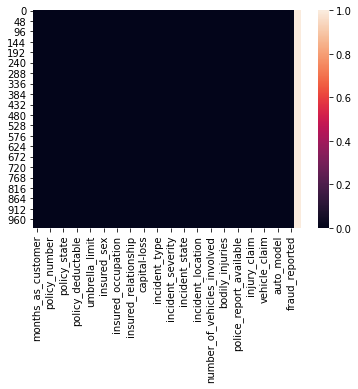

In [9]:
sns.heatmap(df.isnull())

the  last column is showing a complete white column indicating presence of Null values

### Visualizing the Dataset

plotting float variables

<AxesSubplot:ylabel='Frequency'>

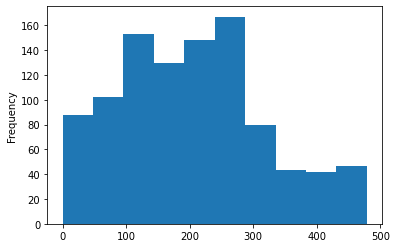

In [10]:
df['months_as_customer'].plot.hist()

As you can see from the above graph that more than 160 customer are from  200-300 months

<AxesSubplot:ylabel='Frequency'>

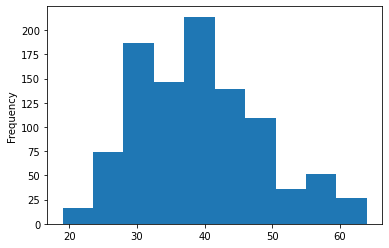

In [11]:
df['age'].plot.hist()

More than 200 people have age of 40

<AxesSubplot:ylabel='Frequency'>

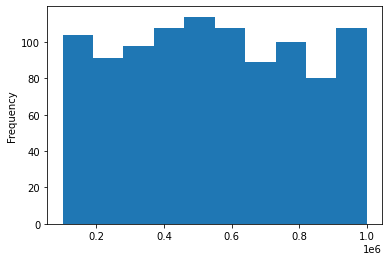

In [12]:
df['policy_number'].plot.hist()

As the policy number for each record in unique so the graph is looking as spread all over,

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

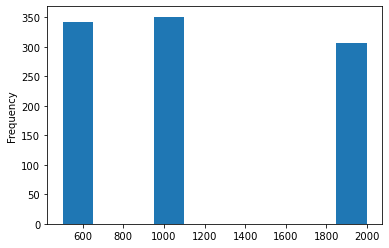

In [13]:
df['policy_deductable'].plot.hist()
df['policy_deductable'].value_counts()

351 customers have policy_deductable of 1000, 342 customers have policy_deductable of 500 and 307 customers have policy_deductable of 2000

<AxesSubplot:ylabel='Frequency'>

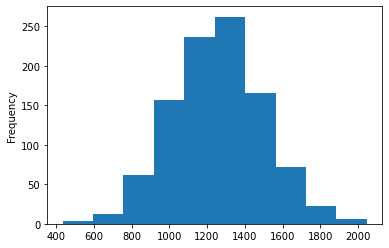

In [14]:
df['policy_annual_premium'].plot.hist()


more than 250 customers have policy_annual_premium between 1200 to 1400

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

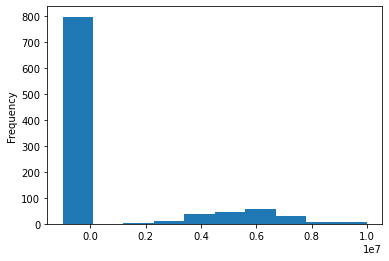

In [15]:
df['umbrella_limit'].plot.hist()
df['umbrella_limit'].value_counts()

as umbrella limit is the extra insurance amount that provides protection beyond existing limits,
here 798 customers have 0 umbrella limit and 57 customers have umbrella limit of 6000000, 46 customers have limit of 5000000, and 39 customers have 4000000 

<AxesSubplot:ylabel='Frequency'>

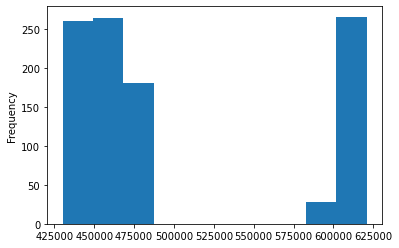

In [16]:
df['insured_zip'].plot.hist()


less than 50 customers have insure_zip near to 57500 to 60000, and almost all other customers have insured zip of 425000 to 475000
and 600000 to  625000

<AxesSubplot:ylabel='Frequency'>

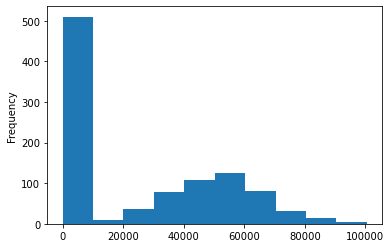

In [17]:
df['capital-gains'].plot.hist()


more than 500 customers have capital gain of 0 rupees and more than 100 people have capital gain of 40000 to 60000,
very few people have capital gain between 80000 to 1,00,000

<AxesSubplot:ylabel='Frequency'>

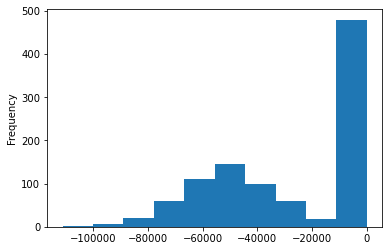

In [18]:
df['capital-loss'].plot.hist()


around 500 customers have got no capital-loss , so it is showing 0 as highest , more than 100 customers have got the capital-loss
of 60000 to 40000, few customers have got the capital loss of 80000 to 100000

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

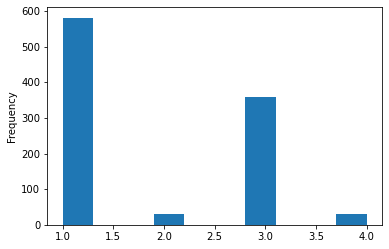

In [19]:
df['number_of_vehicles_involved'].plot.hist()
df['number_of_vehicles_involved'].value_counts()

in 581 cases 1 vehicle was involved , in 358 cases 3 vehicles were involved, in 31 cases 4 vehicles were involved 
and in 30 cases 2 vehicles were involved

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

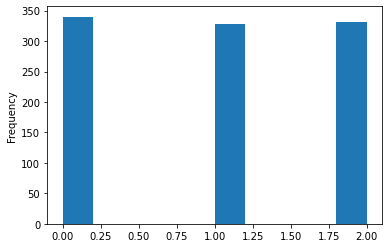

In [20]:
df['bodily_injuries'].plot.hist()
df['bodily_injuries'].value_counts()

340 customers have got 0 means no bodily_injuries , 332 customers have got 2 bodily_injuries and 328 customers have got 1 injury

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

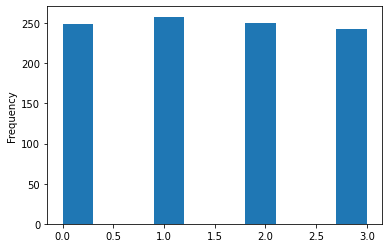

In [21]:
df['witnesses'].plot.hist()
df['witnesses'].value_counts()

in 258 cases there was 1 witness, in 250 cases there were 2 witness , in 249 cases there was no witness, and in 243 cases there were 3 witness

<AxesSubplot:ylabel='Frequency'>

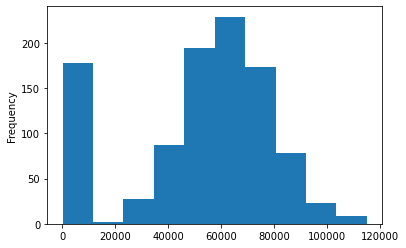

In [22]:
df['total_claim_amount'].plot.hist()


more than 200 people have claim amount above 60000 to 70000 , and more than 150 people have claim amount of 0 Rs , 
remaining peoples have their claim amount between 20000 to 120000

<AxesSubplot:ylabel='Frequency'>

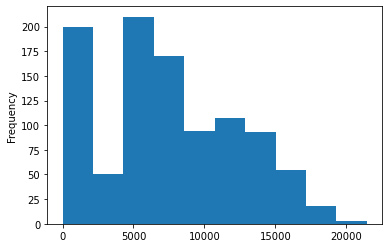

In [23]:
df['injury_claim'].plot.hist()


more than 200 people have the injury_claim between 5000 to 6000 and highest claim amount is recorded of 20000, many people have 0 claim amount too

<AxesSubplot:ylabel='Frequency'>

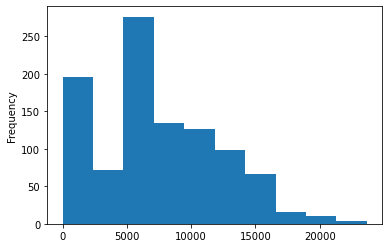

In [24]:
df['property_claim'].plot.hist()


more than 250 customers have property claim of 5000 to 6000 and 200 customers have property claim of 0 to 2500 and many customer
have property claim for 20000 and higher

<AxesSubplot:ylabel='Frequency'>

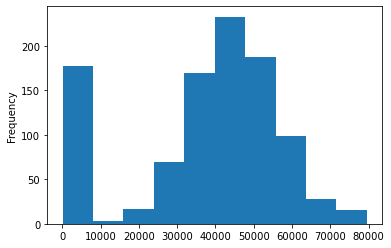

In [25]:
df['vehicle_claim'].plot.hist()


more than 200 customers have claimed for 40000 to 50000 and around 130 customers have claimed between 0 to 10000 and 
less than 50 people have claimed between 70000 to 80000

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

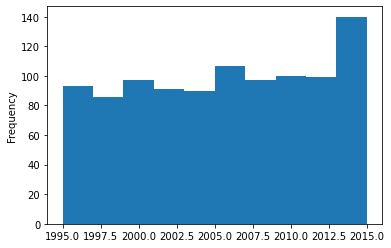

In [26]:
df['auto_year'].plot.hist()
df['auto_year'].value_counts()

in more than 140 customer cases the auto_year is between 2012 to 2015 and the auto year in all cases is between 1995 to 2015

Series([], Name: _c39, dtype: int64)

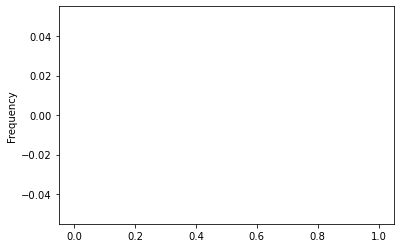

In [27]:
df['_c39'].plot.hist()
df['_c39'].value_counts()

as _c39 is showing an empty list, it means all columns have Nan values and that's why graph is empty

### Visualizng Object variable

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


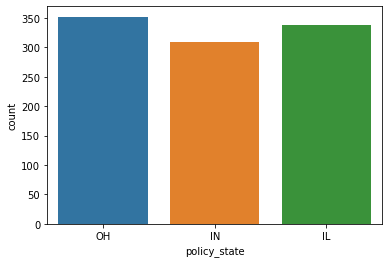

In [28]:
sns.countplot(df['policy_state'])
print(df['policy_state'].value_counts())

352 customers have OH policy ,

338 customers have IL policy,

and 310 customers have IN policy.

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


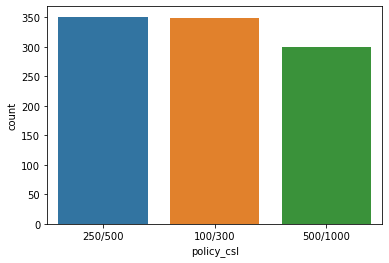

In [29]:
sns.countplot(df['policy_csl'])
print(df['policy_csl'].value_counts())

policy_csl here csl stands for Combined Single Limit,
351 customers have 250/500 combined Single Limit policy,

349 customers have 100/300  combined Single Limit policy and

300 customer have 500/1000  combined Single Limit policy

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


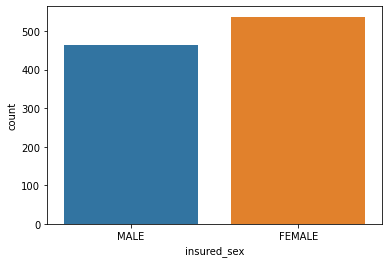

In [30]:
sns.countplot(df['insured_sex'])
print(df['insured_sex'].value_counts())

537 females and 463 males have insured their autombile

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


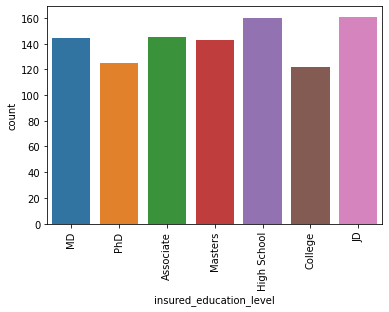

In [31]:
p=sns.countplot(df['insured_education_level'])
p.set_xticklabels(p.get_xticklabels(),rotation=90)
print(df['insured_education_level'].value_counts())

161 customers are JD,  160 have done high school,  145 are associates, 144 are MD,  143 are masters
125 have done PHD , and 122 have done college

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


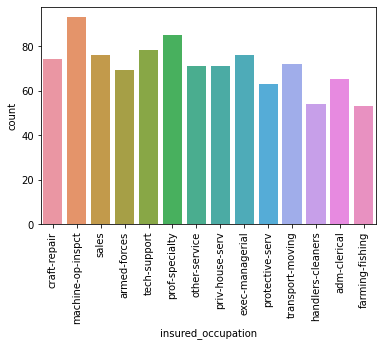

In [32]:
p=sns.countplot(df['insured_occupation'])
p.set_xticklabels(p.get_xticklabels(),rotation=90)
print(df['insured_occupation'].value_counts())

93 are machine-op-inspct   , 85 are  prof-specialty      , 78  are tech-support         ,76 are  exec-managerial ,


76 are of sales   , 74 are  craft-repair,      72  are  transport-moving ,   71 are doing  other-service        ,


71  are priv-house-serv      , 69 are  armed-forces         , 65 are adm-clerical        ,63  are protective-serv      ,

54  are handlers-cleaners   , and 53 are farming-fishing      

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


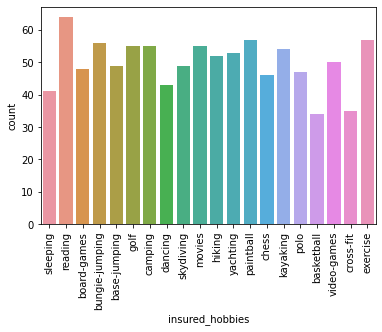

In [33]:
p= sns.countplot(df['insured_hobbies'])
p.set_xticklabels(p.get_xticklabels(),rotation=90)
print(df['insured_hobbies'].value_counts())

64  have hobby of reading , 57 loves doing  exercise  ,     57  do  paintball  , 56   do    bungie-jumping   
,
55  loves to do camping   , 55 play golf     ,  55 loves to watch movies , 54 loves to kayking , 53 loves to do yatching
,
52 do  hiking   ,  50 loves to play  video-games       , 49 loves to do skydiving , 49 do  base-jumping , 48 plays board-games 
,
47 plays polo  , 46 do  chess,      43 do  dancing   , 41 do sleeping , and 35 do  cross-fit     

34 loves to play basketball        

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


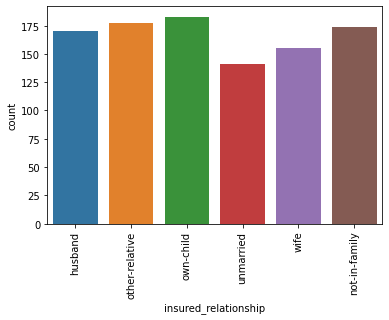

In [34]:
p=sns.countplot(df['insured_relationship'])
p.set_xticklabels(p.get_xticklabels(),rotation=90)
print(df['insured_relationship'].value_counts())

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


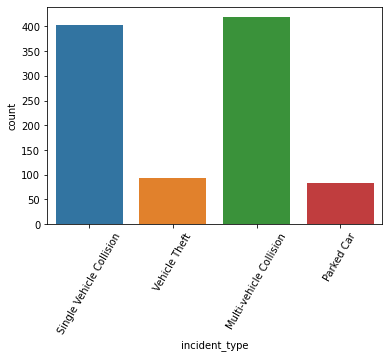

In [35]:
p=sns.countplot(df['incident_type'])
p.set_xticklabels(p.get_xticklabels(),rotation=60)
print(df['incident_type'].value_counts())

in 419 cases there was Multi-Vehicle collision, 

there were 403 cases of Single_Vehicle_collision,

94 cases were of Vehicle Theft,

and 84 cases have parked  car frauds

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


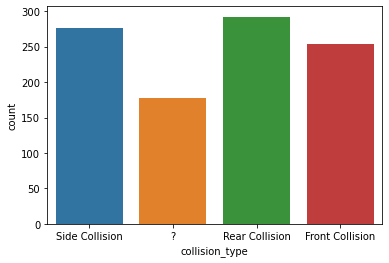

In [36]:
sns.countplot(df['collision_type'])
print(df['collision_type'].value_counts())

in 292 cases there were Rear collision, 276 cases had side collision and 254 cases had front collision , 
in 178  cases there was no proper information so it is written as '?'

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


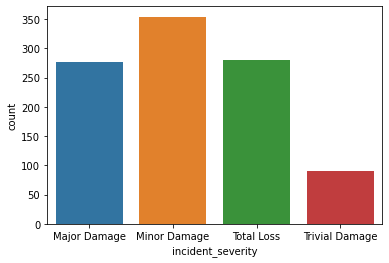

In [37]:
sns.countplot(df['incident_severity'])
print(df['incident_severity'].value_counts())

in 354 cases there was minor damage,

in 280 cases there was Total Loss

in 276 cases there was Major Damage, and in 90 cases there was trivial damage

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


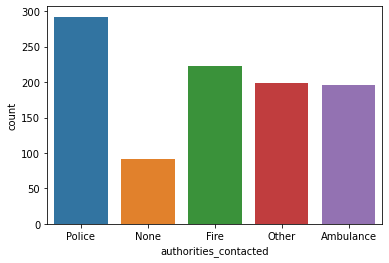

In [38]:
sns.countplot(df['authorities_contacted'])
print(df['authorities_contacted'].value_counts())

In 292 cases it was the police who were contacted, 
in 223 cases Fire extinguishers were contacted, in 198 cases others were contacted , in 196 cases ambulance were contacted
and in 91 cases no one was contacted

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


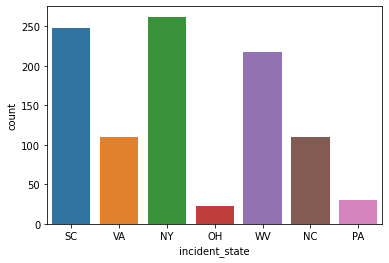

In [39]:
sns.countplot(df['incident_state'])
print(df['incident_state'].value_counts())

these are the states in which incident took place and they are all abbrevations of state of usa

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


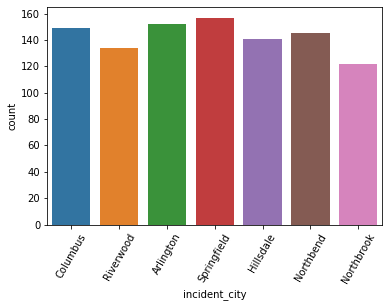

In [40]:
p=sns.countplot(df['incident_city'])
p.set_xticklabels(p.get_xticklabels(),rotation=60)
print(df['incident_city'].value_counts())

157 incident cases took place in Springfield ,
152 incident cases took place in Arlington    ,
149 incident cases took place in Columbus,
145 incident cases took place in  Northbend      ,
141 incident cases took place in  Hillsdale,
134 incident cases took place in Riverwood      ,and 122 incident cases took place in Northbrook     

[Text(0, 0, '9935 4th Drive'),
 Text(1, 0, '6608 MLK Hwy'),
 Text(2, 0, '7121 Francis Lane'),
 Text(3, 0, '6956 Maple Drive'),
 Text(4, 0, '3041 3rd Ave'),
 Text(5, 0, '8973 Washington St'),
 Text(6, 0, '5846 Weaver Drive'),
 Text(7, 0, '3525 3rd Hwy'),
 Text(8, 0, '4872 Rock Ridge'),
 Text(9, 0, '3066 Francis Ave'),
 Text(10, 0, '1558 1st Ridge'),
 Text(11, 0, '5971 5th Hwy'),
 Text(12, 0, '6655 5th Drive'),
 Text(13, 0, '6582 Elm Lane'),
 Text(14, 0, '6851 3rd Drive'),
 Text(15, 0, '9573 Weaver Ave'),
 Text(16, 0, '5074 3rd St'),
 Text(17, 0, '4546 Tree St'),
 Text(18, 0, '3842 Solo Ridge'),
 Text(19, 0, '8101 3rd Ridge'),
 Text(20, 0, '5380 Pine St'),
 Text(21, 0, '8957 Weaver Drive'),
 Text(22, 0, '2526 Embaracadero Ave'),
 Text(23, 0, '5667 4th Drive'),
 Text(24, 0, '2502 Apache Hwy'),
 Text(25, 0, '3418 Texas Lane'),
 Text(26, 0, '2533 Elm St'),
 Text(27, 0, '3790 Andromedia Hwy'),
 Text(28, 0, '3220 Rock Drive'),
 Text(29, 0, '2100 Francis Drive'),
 Text(30, 0, '4687 5th Drive')

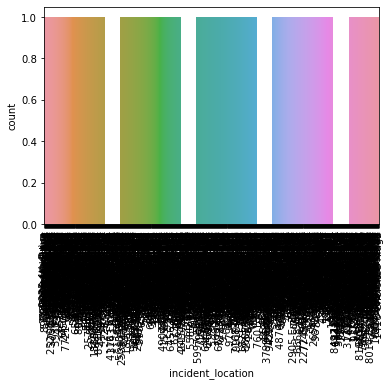

In [41]:
p=sns.countplot(df['incident_location'])
p.set_xticklabels(p.get_xticklabels(),rotation=90)

there are all different locations of each incident

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


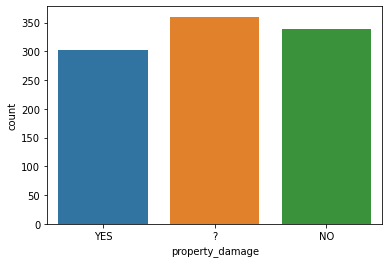

In [42]:
sns.countplot(df['property_damage'])
print(df['property_damage'].value_counts())

In 360 cases it is not properly recorded whether there is property_loss or not,

in 338 cases it was sure that there was no property_damage,

in 302 cases there was property damage.

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


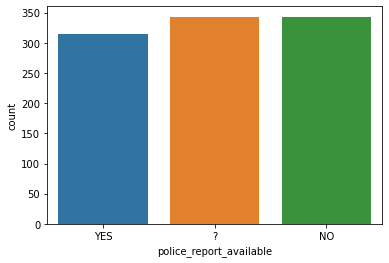

In [43]:
sns.countplot(df['police_report_available'])
print(df['police_report_available'].value_counts())

In 343 it is not sure that  whether the case was recorded and police _record is avaliable or not,

in  343 cases there was no record of the incident and police record is not available

in 314 cases police record is available

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


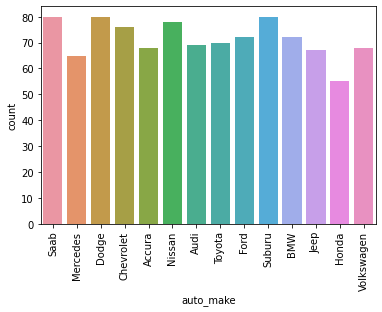

In [44]:
p=sns.countplot(df['auto_make'])
p.set_xticklabels(p.get_xticklabels(),rotation=90)
print(df['auto_make'].value_counts())

in 80 cases the auto make was of Dodge  company,     
in    80 cases the auto make was of suburu company,      
 in        80 cases the auto make was of saab  company   , 
in 78 cases the auto make was of Nissan  company,      
in 76 cases the auto make was of    Chevrolet   company, 
in 72 cases the auto make was of  Ford company,  
in 72 cases the auto make was of     BMW    companty ,      
in 70 cases the auto make was of Toyota  ,
in 69 cases the auto make was of   Audi          ,
in 38 cases the auto make was of  Accura  ,
in 68 cases the auto make was ofVolkswagen company  ,
in 67 cases the auto make was ofJeep   company  ,
in 65 cases the auto make was of Mercedes  ,
and in 55 cases the auto make was of Honda Company


RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
92x               28
Forrestor         28
Camry             28
F150              27
E400              27
95                27
93                25
Grand Cherokee    25
Tahoe             24
Escape            24
Maxima            24
Ultima            23
X5                23
Silverado         22
Highlander        22
Civic             22
Fusion            21
TL                20
ML350             20
Corolla           20
Impreza           20
CRV               20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


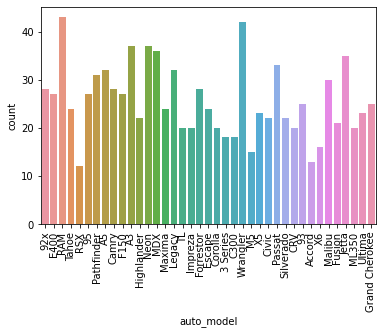

In [45]:
p=sns.countplot(df['auto_model'])
p.set_xticklabels(p.get_xticklabels(),rotation=90)
print(df['auto_model'].value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64


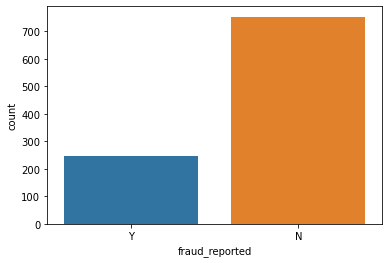

In [46]:
sns.countplot(df['fraud_reported'])
print(df['fraud_reported'].value_counts())

In 753 cases the fraud was not reported and in 247 cases the fraud was reported

### Treating missing values

##### Simple Imputer

In [47]:
list1=['collision_type','property_damage','police_report_available']
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')

for i in list1:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

Label Encoder 

Feature engineering

In [48]:
df['policy_bind_month']=pd.DatetimeIndex(df['policy_bind_date']).month

In [49]:
df['policy_bind_year']=pd.DatetimeIndex(df['policy_bind_date']).year

In [50]:
df['incident_month']=pd.DatetimeIndex(df['incident_date']).month

In [51]:
df['incident_year']=pd.DatetimeIndex(df['incident_date']).year

###### Dropping the date column as we have separated the month and year column of the same and also dropping the _c39 column

In [52]:
df.drop('policy_bind_date',inplace=True, axis=1)

In [53]:
df.drop('incident_date',inplace=True, axis=1)

In [54]:
df.drop('_c39',inplace=True, axis=1)

###### visualizing the dataset after adding and dropping columns 

In [55]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_year,incident_month,incident_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,13020,52080,Saab,92x,2004,Y,10,2014,1,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,3510,Mercedes,E400,2007,Y,6,2006,1,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3850,23100,Dodge,RAM,2007,N,6,2000,2,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,10,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,650,4550,Accura,RSX,2009,N,6,2014,2,2015


#### Label Encoder

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes == object:
        df[i]=le.fit_transform(df[i].astype(str))
        

##### checking the datatypes after Label Encoding

In [57]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

### Descriptive Statistics

describe() method in python describes the basic features of the data,

It gives short summaries aboout the dataset and measures of the dataset like No of items , mean , Standard_Deviation , minimum value of 
dataset, 25th, 50th(median) and 75% percentile of each  column and Gives the maximum value of the dataset too

In [58]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_year,incident_month,incident_year
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,6.559000,2001.604000,3.407000,2015.0
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,3.391758,7.360391,3.276291,0.0
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,1.000000,1990.000000,1.000000,2015.0
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,4.000000,1995.000000,1.000000,2015.0
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,7.000000,2002.000000,2.000000,2015.0
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,9.000000,2008.000000,5.000000,2015.0
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,12.000000,2015.000000,12.000000,2015.0


Observation :
1) In Month_as_customer , policy_annual_premium , property_claim and incident_month the difference between their 75% an max is significant 
indicating the presence of the Outliers

2) In month_as_customer , policy_number, policy_deductable, insured_zip, property_claim, vehicle _claim, the standard deviation is quite high it means the data is widely spread and high dispersion is present

## Checking Correlation

Correlation is a statistical metric for measuring to what extent  different variables are Interdependent .

In another word, if one variable changes how it affects the change in another variable

In [59]:
dfcor=df.corr()

<AxesSubplot:>

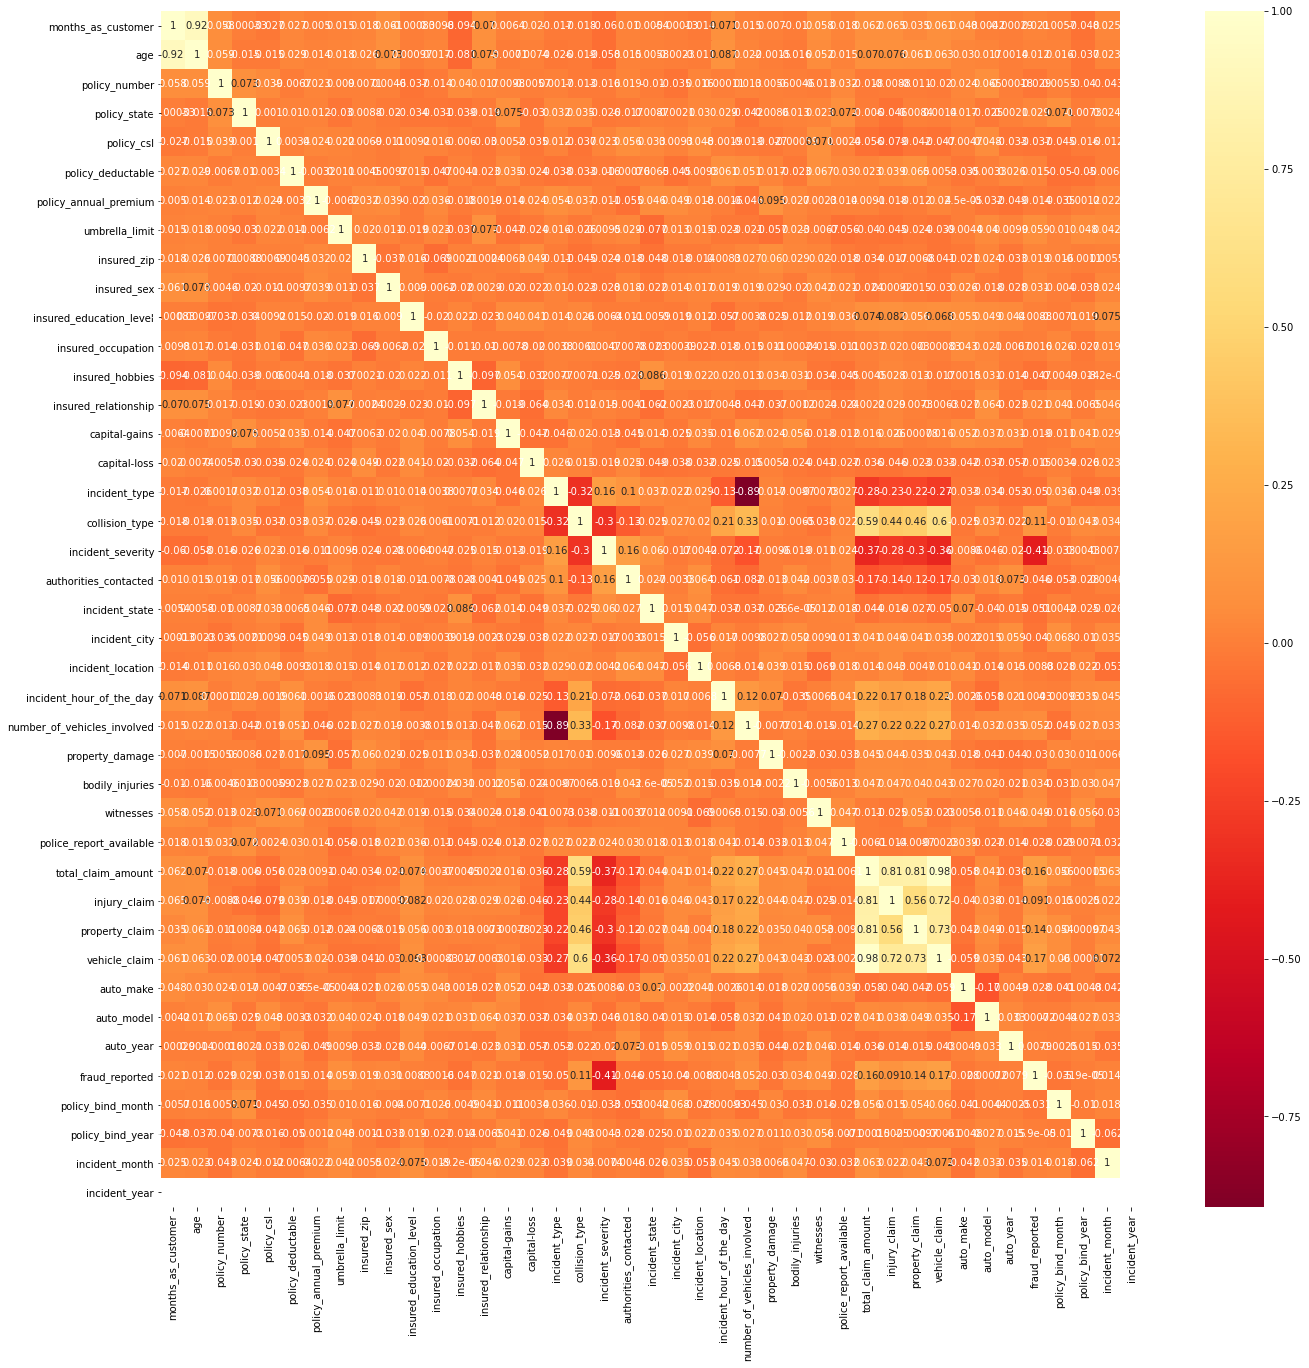

In [60]:
plt.figure(figsize=(22,22))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True,fmt='.2g')

as the dataset is having 40+ columns so it is not showing correlation score properly

### checking Outliers

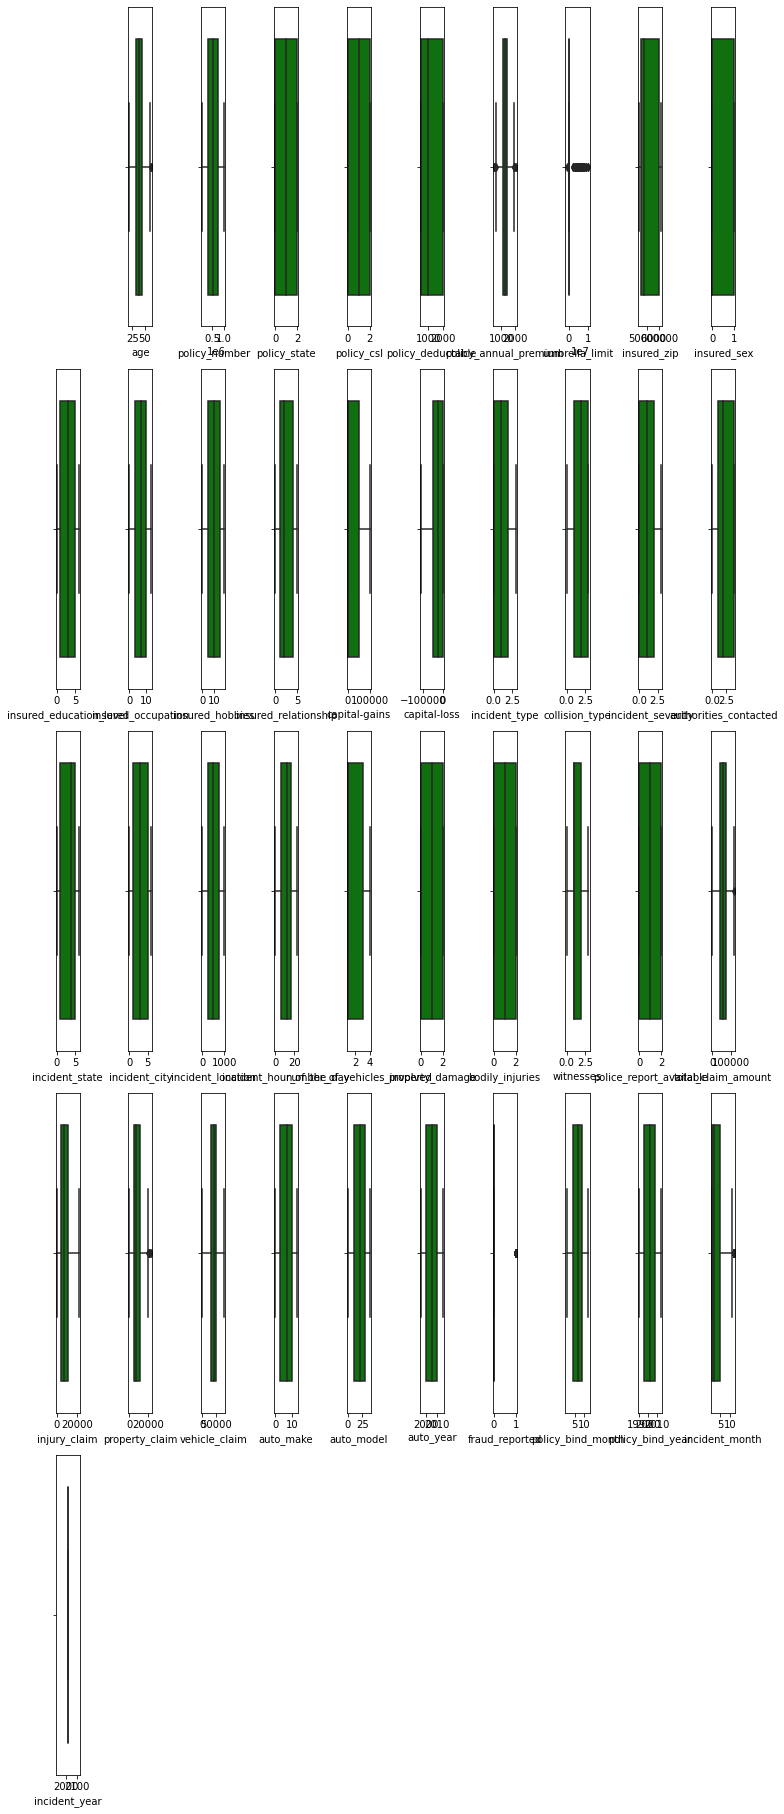

In [61]:
collist=df.columns.values
ncol=10
nrows=10


plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

As many of the columns are converted from categorical to the numerical so they are widely spread in the boxplot

In [62]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [63]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 31,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [64]:
df_new=df[(z<3).all(axis=1)]

In [65]:

df_new.shape , df.shape

((0, 41), (1000, 41))

it is showing that whole dataset contains outliers

### Checking skewness

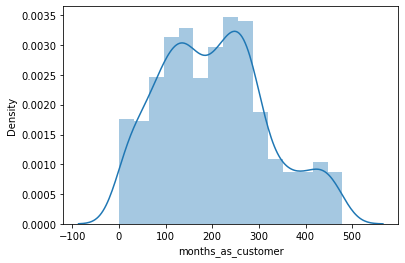

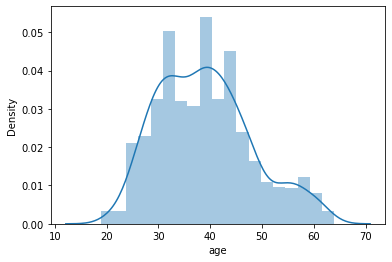

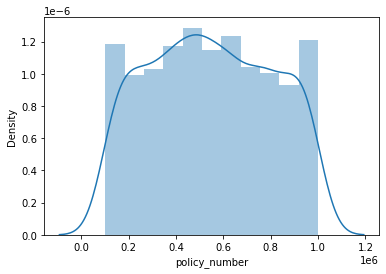

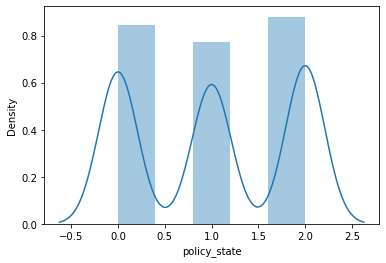

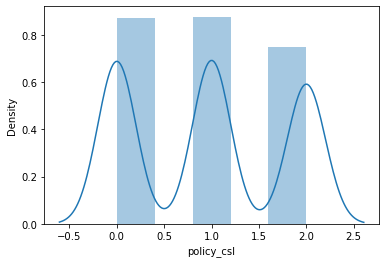

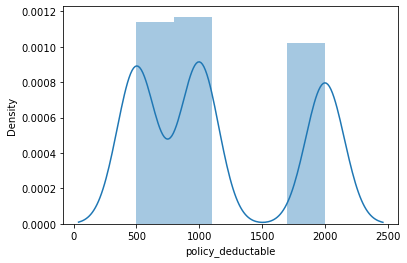

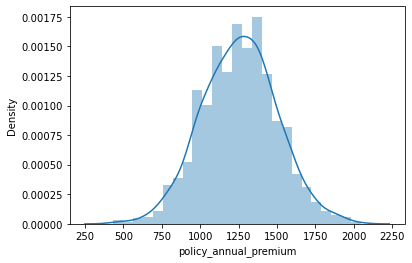

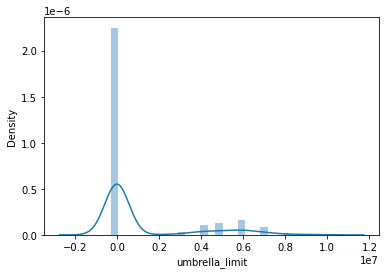

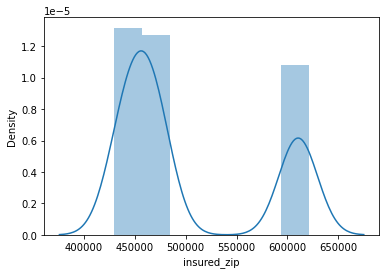

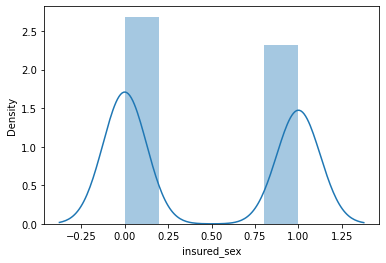

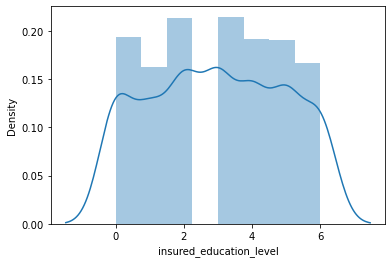

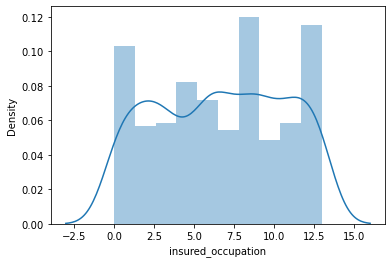

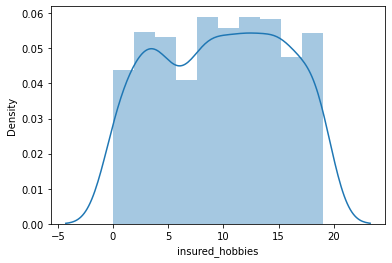

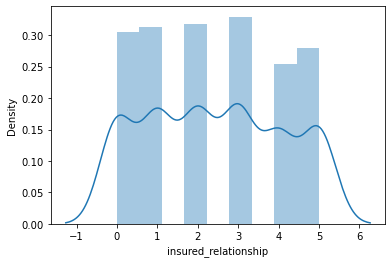

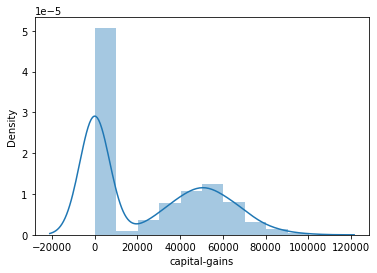

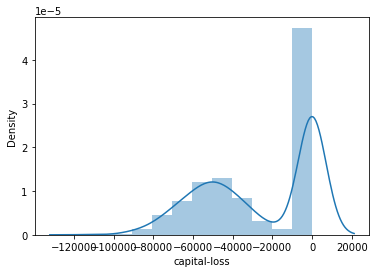

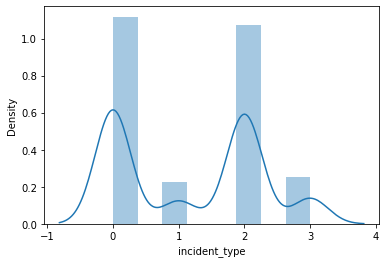

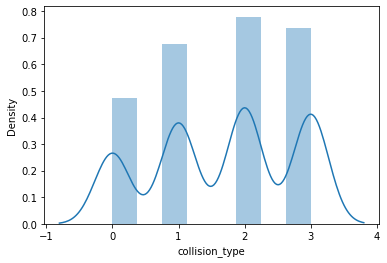

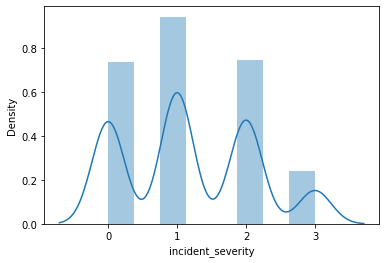

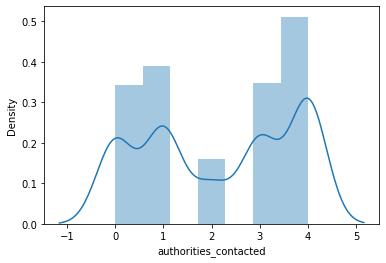

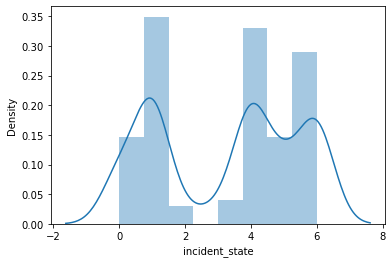

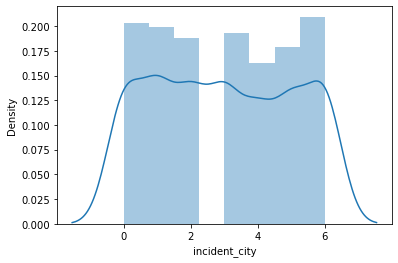

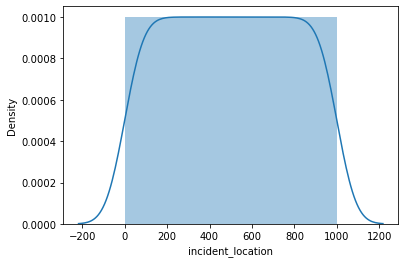

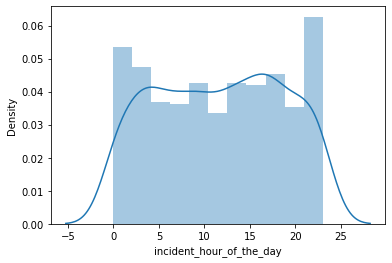

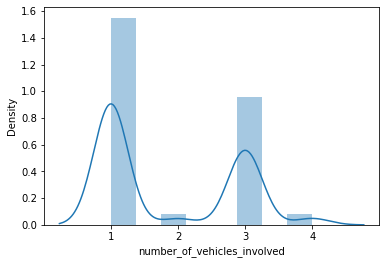

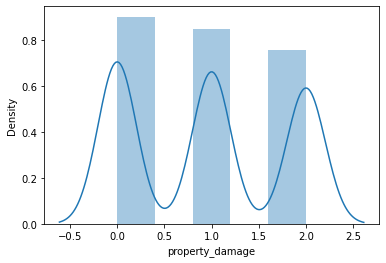

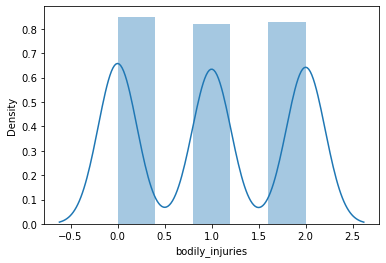

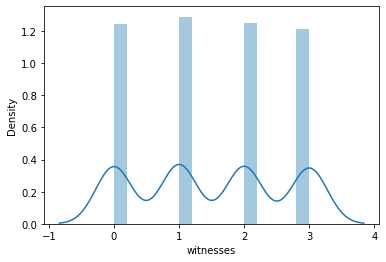

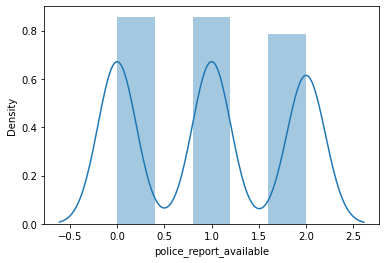

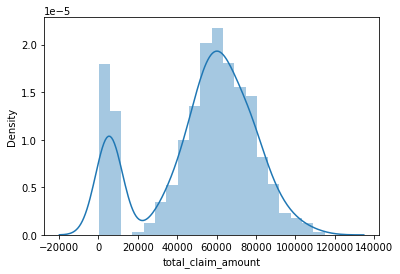

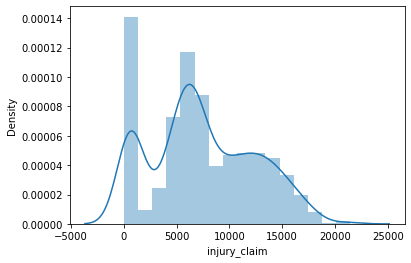

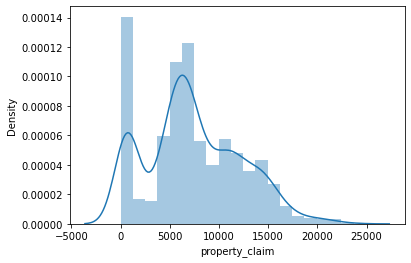

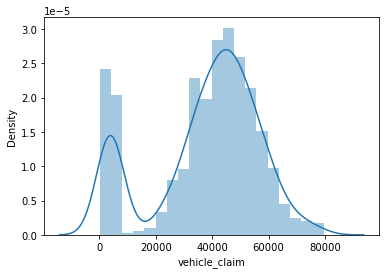

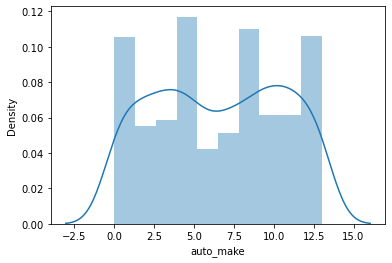

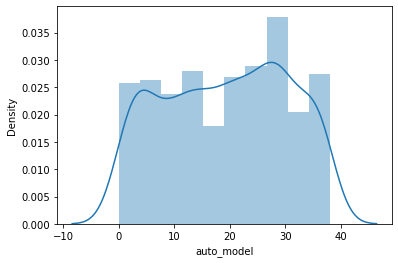

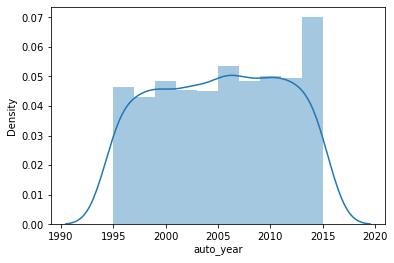

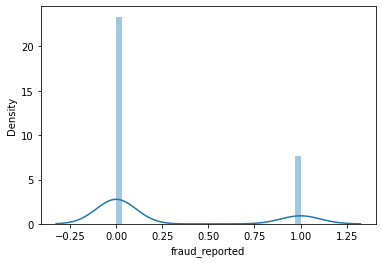

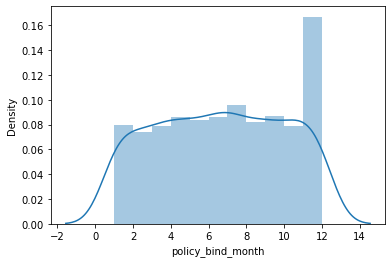

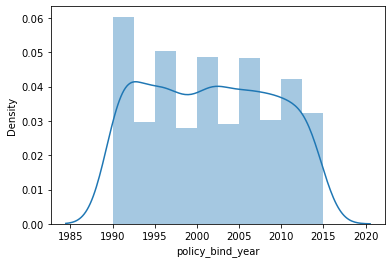

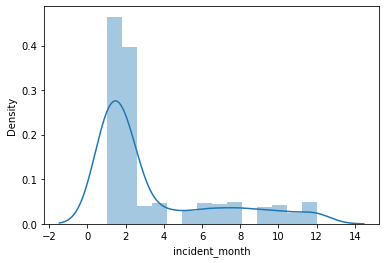

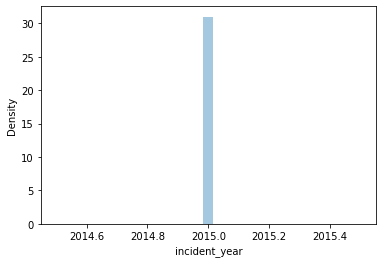

In [66]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

Visually no presence of skewness is observed, besides the column  which are labelly encoded and converted shows little skewness

In [67]:
# checking skewness statistically
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


## Splitting the data into the X and Y

In [68]:
x=df.drop('fraud_reported', axis=1)
x.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_month,policy_bind_year,incident_month,incident_year
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,6510,13020,52080,10,1,2004,10,2014,1,2015
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,780,780,3510,8,12,2007,6,2006,1,2015
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,7700,3850,23100,4,30,2007,6,2000,2,2015
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,6340,6340,50720,3,34,2014,5,1990,10,2015
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1300,650,4550,0,31,2009,6,2014,2,2015


In [69]:
y=df['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

#### importing libraries

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

## Finding the Best Random State of logisticRegression and Training it `

In [71]:
maxaccuracy=0
best_random_state=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.22,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predictlg=lg.predict(x_test)
    accuracy =accuracy_score(y_test, predictlg)
    if accuracy > maxaccuracy :
        maxaccuracy = accuracy
        best_random_state = i
print(f"Highest accuracy is  {maxaccuracy} at a random_state of {best_random_state}")

Highest accuracy is  0.8318181818181818 at a random_state of 190


###### best random state is 190 giving the accuracy score of 83 %

In [72]:
from sklearn.linear_model import LogisticRegression

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=190)
lg = LogisticRegression()
lg.fit(x_train,y_train)
predlg = lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8318181818181818
[[179   2]
 [ 35   4]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       181
           1       0.67      0.10      0.18        39

    accuracy                           0.83       220
   macro avg       0.75      0.55      0.54       220
weighted avg       0.81      0.83      0.78       220



##### Logistic Regression is giving the accuracy of 83%

## Finding best random state for  DecisionTreeClassifier and training it

In [88]:
from sklearn.tree import DecisionTreeClassifier


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    accuracy=accuracy_score(y_test,preddtc)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
        print(f"accuracy is {maxaccuracy} at {i}")
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

accuracy is 0.8272727272727273 at 1
accuracy is 0.8363636363636363 at 48
accuracy is 0.8454545454545455 at 50
accuracy is 0.85 at 96
accuracy is 0.8545454545454545 at 189
accuracy is 0.8590909090909091 at 508
maximum accuracy  is :  0.8590909090909091 and best random state is 508


best random state for DecisionTreeClassifier is 189

In [91]:
# from sklearn.tree import DecisionTreeClassifier

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=508)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.8545454545454545
[[146  14]
 [ 18  42]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       160
           1       0.75      0.70      0.72        60

    accuracy                           0.85       220
   macro avg       0.82      0.81      0.81       220
weighted avg       0.85      0.85      0.85       220



###### DecisionTreeClassifier is giving the accuracy of  85` %

## Finding best random state for RandomForestClassifier and training it

In [92]:
from sklearn.ensemble import RandomForestClassifier


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    accuracy=accuracy_score(y_test,predrfc)
    #print(f"accuracy is {accuracy} at random_state {i}")
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
        print(f"accuracy is {maxaccuracy} at {i}")
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

accuracy is 0.7272727272727273 at 1
accuracy is 0.759090909090909 at 2
accuracy is 0.7636363636363637 at 3
accuracy is 0.8045454545454546 at 6
accuracy is 0.8363636363636363 at 16
accuracy is 0.8454545454545455 at 317
accuracy is 0.85 at 319
maximum accuracy  is :  0.85 and best random state is 319


In [100]:

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=319)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))


0.85
[[166  13]
 [ 20  21]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       179
           1       0.62      0.51      0.56        41

    accuracy                           0.85       220
   macro avg       0.76      0.72      0.73       220
weighted avg       0.84      0.85      0.84       220



###### RandomForestClassifier is giving the accuracy of 85 %

## Finding best random state for SVC and training it

In [102]:
from sklearn.svm import SVC


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    accuracy=accuracy_score(y_test,predsvc)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
        print(f"accuracy is {maxaccuracy} at {i}")
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

accuracy is 0.7227272727272728 at 1
accuracy is 0.7454545454545455 at 2
accuracy is 0.75 at 3
accuracy is 0.7954545454545454 at 6
accuracy is 0.8227272727272728 at 16
accuracy is 0.8272727272727273 at 488
accuracy is 0.8318181818181818 at 584
maximum accuracy  is :  0.8318181818181818 and best random state is 584


###### the best random state of SVC model is 584 giving the accuracy of 83%

In [104]:
from sklearn.svm import SVC

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=584)
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.8318181818181818
[[183   0]
 [ 37   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       183
           1       0.00      0.00      0.00        37

    accuracy                           0.83       220
   macro avg       0.42      0.50      0.45       220
weighted avg       0.69      0.83      0.76       220



###### The SVC model is giving accuracy of 83%

## Cross Validation of All models

sometimes in train-test-split there are chances that model may learn less and also to remove overfitting and underfitting of model so cross-validation of the model is necessary and it can be done using cross_val_score

In [105]:
# checking the cross-validation-score of the logistic model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lg,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.756 
 At  cross fold 3  the cv_core is 0.7409894924864985 
 At  cross fold 4  the cv_core is 0.752 
 At  cross fold 5  the cv_core is 0.751 
 At  cross fold 6  the cv_core is 0.750006012072241 
 At  cross fold 7  the cv_core is 0.7520015196071533 
 At  cross fold 8  the cv_core is 0.753 
 At  cross fold 9  the cv_core is 0.7529940654940657 


###### the best cross_val_score of Logistic Regression is    75.3%  at cv= 8

In [109]:
# checking the cross-validation-score of the DecisionTreeClassifier model is 
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.774 
 At  cross fold 3  the cv_core is 0.7659935384486283 
 At  cross fold 4  the cv_core is 0.786 
 At  cross fold 5  the cv_core is 0.771 
 At  cross fold 6  the cv_core is 0.7770182526513238 
 At  cross fold 7  the cv_core is 0.7879936964444006 
 At  cross fold 8  the cv_core is 0.78 
 At  cross fold 9  the cv_core is 0.7760170885170885 


###### the best cross_val_score of DecisionTreeClassifier is  78.79%    at cv= 7

In [111]:
# checking the cross-validation-score of the RandomForestClassifier model is
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.776 
 At  cross fold 3  the cv_core is 0.7670125215035394 
 At  cross fold 4  the cv_core is 0.78 
 At  cross fold 5  the cv_core is 0.767 
 At  cross fold 6  the cv_core is 0.775028256739533 
 At  cross fold 7  the cv_core is 0.7740287881132951 
 At  cross fold 8  the cv_core is 0.758 
 At  cross fold 9  the cv_core is 0.764979264979265 


###### the best cross_val_score of RandomForestClassifier is   77.6 %  at cv= 2

In [114]:
# checking the cross-validation-score of the SVC model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.753 
 At  cross fold 3  the cv_core is 0.7530015044985104 
 At  cross fold 4  the cv_core is 0.7530000000000001 
 At  cross fold 5  the cv_core is 0.7529999999999999 
 At  cross fold 6  the cv_core is 0.7530000240482889 
 At  cross fold 7  the cv_core is 0.7530005206061542 
 At  cross fold 8  the cv_core is 0.753 
 At  cross fold 9  the cv_core is 0.753003003003003 


###### the best cross_val_score of Logistic Regression is   75.%   at cv= 8

In [ ]:
# MODEL                                ACCURACY                  CROSS_VAL_SCORE          DIFFERENCE

# LogisticRegression                        83                            75                  8
# DecisionTreeClassifier                    85                            78                  7
# RandomForestClassifier                    85                            77                  8
# SVC                                       83                            75                  8    

##### from the above table we can observe that the DecisionTreeClassifier is having the minimum difference between Accuracy and Cross_val_score   as compared to all other models, so we will take DecisionTreeClassifier as our Final model

## Hyper Parameter Tuning

In [115]:
from sklearn.model_selection import GridSearchCV
 # creating parameter list to pass in GridSearchCV
parameters ={'max_depth': np.arange(2,15),
            'criterion':['gini','entropy']}

In [116]:
CGV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=7)

In [117]:
CGV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [118]:
CGV.best_params_ 

{'criterion': 'entropy', 'max_depth': 3}

In [119]:
CGV_pred=CGV.best_estimator_.predict(x_test)

In [120]:
accuracy_score(y_test,CGV_pred)

0.8863636363636364

In [121]:
import joblib
joblib.dump(CGV.best_estimator_,'Automobile_Insurance_Fraud_Detection_DTC.pkl')

['Automobile_Insurance_Fraud_Detection_DTC.pkl']

### Conclusion 

## we have exported the model using DecisionTreeClassifier Algorithm with accuracy of 88%